# Stats 21 Final Exam - Fri Dec 9 2022

### Academic Integrity

This is a final exam. You are not allowed to communicate with other students during the exam. No collaboration allowed.

Sharing any portion of this exam, even after the course ends, is a violation of the UCLA code of conduct.

If you open this file on Fri Dec 9 2022, sharing this exam with students who are taking the exam at another time is a violation of the UCLA code of conduct. If you are taking the exam on a day other than Dec 9 2022, obtaining this exam is a violation of the UCLA code of conduct.

If you are not enrolled in Stats 21 during Fall 2022, using this file to study for Stats 21 is a violation of the UCLA code of conduct.

To acknowledge that you have read this, type your name in the following markdown box.

I have read the above statements. Your name: Connie Ma

# Part 0 - Import Data

You will work with data from NHANES - National Health and Nutrition Examination Survey.

We merge two tables from NHANES. 

1) The Demographic information table (DEMO_I) which contains information about the patients' sexes and ages.
2) The Body measures table (BMX_I) which contains information about the height, weight, and other measures.

There are many variables. I'll try to point out 

Data Dictionaries

https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/DEMO_J.htm

https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/BMX_J.htm

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
bmx = pd.read_sas('BMX_J.XPT')

In [3]:
demo = pd.read_sas('DEMO_J.XPT')

In [4]:
merged = bmx.merge(right = demo, on = 'SEQN')

In [5]:
merged.shape

(8704, 66)

In [6]:
merged.columns

Index(['SEQN', 'BMDSTATS', 'BMXWT', 'BMIWT', 'BMXRECUM', 'BMIRECUM', 'BMXHEAD',
       'BMIHEAD', 'BMXHT', 'BMIHT', 'BMXBMI', 'BMXLEG', 'BMILEG', 'BMXARML',
       'BMIARML', 'BMXARMC', 'BMIARMC', 'BMXWAIST', 'BMIWAIST', 'BMXHIP',
       'BMIHIP', 'SDDSRVYR', 'RIDSTATR', 'RIAGENDR', 'RIDAGEYR', 'RIDAGEMN',
       'RIDRETH1', 'RIDRETH3', 'RIDEXMON', 'RIDEXAGM', 'DMQMILIZ', 'DMQADFC',
       'DMDBORN4', 'DMDCITZN', 'DMDYRSUS', 'DMDEDUC3', 'DMDEDUC2', 'DMDMARTL',
       'RIDEXPRG', 'SIALANG', 'SIAPROXY', 'SIAINTRP', 'FIALANG', 'FIAPROXY',
       'FIAINTRP', 'MIALANG', 'MIAPROXY', 'MIAINTRP', 'AIALANGA', 'DMDHHSIZ',
       'DMDFMSIZ', 'DMDHHSZA', 'DMDHHSZB', 'DMDHHSZE', 'DMDHRGND', 'DMDHRAGZ',
       'DMDHREDZ', 'DMDHRMAZ', 'DMDHSEDZ', 'WTINT2YR', 'WTMEC2YR', 'SDMVPSU',
       'SDMVSTRA', 'INDHHIN2', 'INDFMIN2', 'INDFMPIR'],
      dtype='object')

## Part 1 A: Do baby boys weigh more than baby girls on average?

The variable for the age in months is `RIDAGEMN`. 

https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/DEMO_J.htm#RIDAGEMN

The variable for gender is `RIAGENDR`

https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/DEMO_J.htm#RIAGENDR

The variable for the weight is `BMXWT`

https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/BMX_J.htm#BMXWT

- [5 pts] Calculate and display the mean weight of baby boys for each month, from month 0 to 12. You’ll produce 13 values, one for each month.

In [205]:
age = merged.RIDAGEMN[merged.RIDAGEMN <=12]
boys = merged.RIAGENDR[merged.RIAGENDR == 1]

boysmw = merged['BMXWT'].groupby([boys, age]).mean()
boysmw

RIAGENDR  RIDAGEMN    
1.0       5.397605e-79     4.689474
          1.000000e+00     5.300000
          2.000000e+00     6.514286
          3.000000e+00     6.853333
          4.000000e+00     7.220000
          5.000000e+00     8.308333
          6.000000e+00     8.754545
          7.000000e+00     9.023529
          8.000000e+00     9.612500
          9.000000e+00     9.453846
          1.000000e+01     9.225000
          1.100000e+01    10.011765
          1.200000e+01    10.560000
Name: BMXWT, dtype: float64

- [5 pts] Calculate and display the mean weight of baby girls for each month, from month 0 to 12.

In [174]:
age = merged.RIDAGEMN[merged.RIDAGEMN <=12]
girls = merged.RIAGENDR[merged.RIAGENDR == 2]

girlsmw = merged['BMXWT'].groupby([girls, age]).mean()
girlsmw

RIAGENDR  RIDAGEMN    
2.0       5.397605e-79     4.440000
          1.000000e+00     4.976471
          2.000000e+00     5.790909
          3.000000e+00     6.626667
          4.000000e+00     6.731818
          5.000000e+00     7.544444
          6.000000e+00     8.212500
          7.000000e+00     8.242857
          8.000000e+00     8.645455
          9.000000e+00     9.500000
          1.000000e+01     8.971429
          1.100000e+01     8.977778
          1.200000e+01    10.180000
Name: BMXWT, dtype: float64

- [5 pts] Calculate and display the difference between the mean weights of boys and girls for each month

In [189]:
difference = pd.Series(boysmw.values - girlsmw.values)
difference

0     0.249474
1     0.323529
2     0.723377
3     0.226667
4     0.488182
5     0.763889
6     0.542045
7     0.780672
8     0.967045
9    -0.046154
10    0.253571
11    1.033987
12    0.380000
dtype: float64


- [5 pts] Make a line plot showing two lines: one for boys' mean weights months 0-12, and one for girls' mean weights 0-12 (in a different color). The month will go on the x-axis, and the mean weight will go on the y-axis.


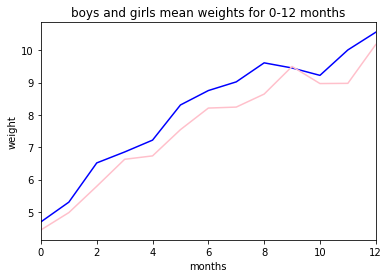

In [210]:
b = boysmw.values
g = girlsmw.values

plt.plot(b, 'blue')
plt.plot(g, 'pink')
plt.xlim(0, 12)
plt.title('boys and girls mean weights for 0-12 months')
plt.xlabel('months')
plt.ylabel('weight')
plt.show()

- [5 pts] Comment on what you think the data says about the question: Do baby boys weigh more than baby girls on average? Include any additional analysis you deem appropriate.

Overall, yes baby boys seem to weigh more than baby girls on average because in the plot the blue line representing boys' mean weights is generally consistently above the pink line representing girls' mean weights.

## Part 1 B: What is the relationship between height, leg length, and arm length? Does this relationship change with age?

The variable for age in years is `RIDAGEYR`

- https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/DEMO_J.htm#RIDAGEYR

The variables for height, leg length, and arm length are: `BMXHT`, `BMXLEG`, `BMXARML`

- https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/BMX_J.htm#BMXHT
- https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/BMX_J.htm#BMXLEG
- https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/BMX_J.htm#BMXARML

- [5 pts] Filter the data to all adults aged 20 and up, who have all three measurements of height, upper leg length, and upper arm length. Report the number of rows.

In [222]:
merged2 = merged[merged.RIDAGEYR >= 20]
merged3 = merged2.dropna(subset=['BMXHT', 'BMXLEG', 'BMXARML'])
merged3

# there are 4903 rows now

,SEQN,BMDSTATS,BMXWT,BMIWT,BMXRECUM,BMIRECUM,BMXHEAD,BMIHEAD,BMXHT,BMIHT,...,DMDHREDZ,DMDHRMAZ,DMDHSEDZ,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
2,93705.0,1.0,79.5,NaN,NaN,NaN,NaN,NaN,158.3,NaN,...,1.0,2.0,NaN,8614.571172,8338.419786,2.0,145.0,3.0,3.0,0.82
5,93708.0,1.0,53.5,NaN,NaN,NaN,NaN,NaN,150.2,NaN,...,1.0,1.0,1.0,13329.450589,14372.488765,2.0,138.0,6.0,6.0,1.63
6,93709.0,1.0,88.8,NaN,NaN,NaN,NaN,NaN,151.1,NaN,...,2.0,2.0,NaN,12043.388271,12277.556662,1.0,136.0,2.0,2.0,0.41
8,93711.0,1.0,62.1,NaN,NaN,NaN,NaN,NaN,170.6,NaN,...,3.0,1.0,3.0,11178.260106,12390.919724,2.0,134.0,15.0,15.0,5.00
10,93713.0,1.0,74.9,NaN,NaN,NaN,NaN,NaN,178.6,NaN,...,2.0,2.0,NaN,174806.575152,166841.660681,1.0,140.0,6.0,6.0,2.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8697,102949.0,1.0,76.9,NaN,NaN,NaN,NaN,NaN,180.1,NaN,...,2.0,1.0,NaN,29334.650205,30287.188731,2.0,139.0,6.0,6.0,1.01
8699,102952.0,1.0,49.0,NaN,NaN,NaN,NaN,NaN,156.5,NaN,...,2.0,1.0,1.0,16896.276203,18338.711104,2.0,138.0,4.0,4.0,0.95
8700,102953.0,1.0,97.4,NaN,NaN,NaN,NaN,NaN,164.9,NaN,...,2.0,2.0,NaN,61630.380013,63661.951573,2.0,137.0,12.0,12.0,NaN
8701,102954.0,1.0,69.1,NaN,NaN,NaN,NaN,NaN,162.6,NaN,...,2.0,2.0,NaN,17160.895269,17694.783346,1.0,144.0,10.0,10.0,1.18


- [5 pts] Report the following correlation values for the filtered data.
    - What is the correlation between standing height and upper leg length?
    - What is the correlation between standing height and upper arm length?
    - What is the correlation between upper leg length and upper arm length?

In [225]:
corr1 = merged3.BMXHT.corr(merged3.BMXLEG)
print(corr1)
corr2 = merged3.BMXHT.corr(merged3.BMXARML)
print(corr2)
corr3 = merged3.BMXLEG.corr(merged3.BMXARML)
print(corr3)

0.7892041831850632
0.8063834124237311
0.6532134714354068


- [5 pts] Read the documentation on `pandas.cut()`. Make adult age groups by decade: i.e. adults aged 20-29.9, adults aged 30-39.9, ... adults aged 70-79.9, adults aged 80+ (7 groups total). Add the column to the filtered data. Print the `.head()` of the resulting data.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html

In [250]:
bins = [20, 30, 40, 50, 60, 70, 80, 90]
binned = pd.cut(merged3.RIDAGEYR.values, bins)
merged3['Age Groups'] = binned
merged3.head()

/var/folders/4v/lv70_t_92799hshrhcrbkq2m0000gn/T/ipykernel_15506/3161117829.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged3['Age Groups'] = binned


,SEQN,BMDSTATS,BMXWT,BMIWT,BMXRECUM,BMIRECUM,BMXHEAD,BMIHEAD,BMXHT,BMIHT,...,DMDHRMAZ,DMDHSEDZ,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR,Age Groups
2,93705.0,1.0,79.5,NaN,NaN,NaN,NaN,NaN,158.3,NaN,...,2.0,NaN,8614.571172,8338.419786,2.0,145.0,3.0,3.0,0.82,"(60, 70]"
5,93708.0,1.0,53.5,NaN,NaN,NaN,NaN,NaN,150.2,NaN,...,1.0,1.0,13329.450589,14372.488765,2.0,138.0,6.0,6.0,1.63,"(60, 70]"
6,93709.0,1.0,88.8,NaN,NaN,NaN,NaN,NaN,151.1,NaN,...,2.0,NaN,12043.388271,12277.556662,1.0,136.0,2.0,2.0,0.41,"(70, 80]"
8,93711.0,1.0,62.1,NaN,NaN,NaN,NaN,NaN,170.6,NaN,...,1.0,3.0,11178.260106,12390.919724,2.0,134.0,15.0,15.0,5.00,"(50, 60]"
10,93713.0,1.0,74.9,NaN,NaN,NaN,NaN,NaN,178.6,NaN,...,2.0,NaN,174806.575152,166841.660681,1.0,140.0,6.0,6.0,2.65,"(60, 70]"


- [5 pts] For each age group, calculate the mean of the three values. The result should be a table with 7 rows and three columns. Modify the index so the row of each index is the smallest age in each decade: i.e. `20, 30, 40, ... , 80`. Print the resulting table.

In [257]:
meanheight = merged3['BMXHT'].groupby(merged3['Age Groups']).mean()
meanlegL = merged3['BMXLEG'].groupby(merged3['Age Groups']).mean()
meanarmL = merged3['BMXARML'].groupby(merged3['Age Groups']).mean()

j = pd.DataFrame({'height': meanheight, 'leg length': meanlegL, 'arm length': meanarmL})
j

,height,leg length,arm length
Age Groups,,,
"(20, 30]",167.590934,40.495264,37.148173
"(30, 40]",167.983421,40.136184,37.337368
"(40, 50]",167.559079,39.295393,37.468564
"(50, 60]",166.215039,38.398541,37.249944
"(60, 70]",165.362701,38.089711,37.357342
"(70, 80]",164.019974,37.669390,37.432815
"(80, 90]",NaN,NaN,NaN


- [5 pts] Make a plot with three lines showing the relationship between the age decade and the mean height, leg length, and arm length.
     - Plot three lines: mean height, mean leg length, mean arm length.
     - The x-axis will be the age decade, and the y-axis will be the mean measurement for each age group.
     - Be sure to include a legend

- [5 pts] Because leg length and arm length are similar in scale, but height is not, add a fourth column - 'adjusted mean height' - which is the mean height minus 128 cm.
- Create the same plot as before: 
    - Plot three lines: adjusted mean height, mean leg length, mean arm length.
    - The x-axis will be the age decade, and the y-axis will be the mean measurement for each age group.
    - Include a legend

- [5 pts] Comment on what you think the data says about the questions: What is the relationship between height, leg length, and arm length? Does this relationship change with age? Include any additional analysis you deem appropriate.

## Part 2

### Function A [10 pts]

Write a function `edit_str(s, i, w)` that will modify a given string by replacing the character at a given position with another given string.

The arguments are:

- `s` the starting string 
- `i` the index of the character to be replaced
- `w` the new string to replace the character at `i`

The function should return the value, not just print to the screen.

For example:

- `edit_str("hello", 0, "b")` will produce: `"bello"`
- `edit_str("0123456", 4, "you")` will produce: `"0123you56"`

In [60]:
def edit_str(s, i , w):
    s = s[:i] + w + s[i+1:]
    return s

In [61]:
# test case do not modify
edit_str("hello", 0, "b")

'bello'

In [62]:
# test case do not modify
edit_str("0123456", 4, "you")

'0123you56'

### Function B [10 pts]

Write a function `extract_digits(l)` that will go through a list of strings. It will return a dictionary with a count of all digits it encountered.

The argument is:

- `l` a list of strings where some elements are digits.

The function should return a dictionary of length 10. The keys are the digits 0 through 9. The values associated with each key is the count of how many times the digit was seen.

For example:



In [69]:
def extract_digits(l):
    digits = {'0':0, '1':0, '2':0, '3':0, '4':0, '5':0, '6':0, '7':0, '8':0, '9':0}
    l2 = []
    
    for string in l:
        for letter in string:
            l2.append(letter)
        
    for letter in l2:
        if letter.isdigit():
            digits[letter] += 1
            
    return digits

In [70]:
# test case, do not modify
l = ['abc123', 'def12', '1', '9999', '99 friend 9']
extract_digits(l)

{'0': 0,
 '1': 3,
 '2': 2,
 '3': 1,
 '4': 0,
 '5': 0,
 '6': 0,
 '7': 0,
 '8': 0,
 '9': 7}

In [71]:
l = ['3.141592653589793', '2.718281828459045', '1.4142135623730951']
extract_digits(l)

{'0': 2,
 '1': 8,
 '2': 6,
 '3': 6,
 '4': 5,
 '5': 7,
 '6': 2,
 '7': 3,
 '8': 5,
 '9': 5}

## Class Definition [20 pts]

Define a class, `Account`, which will be used to store a bank account.

The `Account` class will hold info:

- `name`: a string with the account holder's name
- `balance`: a float to  represent the money in the account.

The class should have the following behaviors:

- A new account for "Miles" with \$101.50 can be created with `Account('Miles', 101.5)`. If no name is provided, the default name should be 'anon', and the default starting balance should be 0.
- The string representation of the account is: `name's account. Balance: $x`. For example, `Miles's account. Balance: $101.50`. There should be two places after the decimal.
- Create a method `deposit(x)`. You may assume `x` will always be positive. It will deposit `x` dollars to the account. After depositing, it will print the new balance to the screen.
- Create a method `withdraw(x)`. You may assume `x` will always be positive. It will first check to see if the balance is at least as large as `x`. If the balance is less than `x`, it will raise a ValueError exception. If the balance is greater than `x`, it will deduct `x` dollars from the account and print the new balance to the screen.
- You should be able to compare one Account instance with another Account instance by comparing the dollar amounts in them.
- If you add one account with another account, it will combine the balances together. The name on the new account will be `name1 and name2`. For example:
    - `acct1 = Account("Miles", 101.5)`
    - `acct2 = Account("Krystal", 120)`
    - `acct3 = acct1 + acct2`. `print(acct3)` produces `Miles and Krystal's account. Balance: $221.50`


In [141]:
class Account:
    def __init__(self, name = 'anon', balance = 0):
        self.name = name
        self.balance = balance
        
    def __str__(self):
        return "{}'s account. Balance: ${:.2f}" .format(self.name, self.balance)
    
    def deposit(self, x):
        self.balance += x
        print(self.balance)
        
    def withdraw(self, x):
        if self.balance < x:
            raise ValueError('Current account balance is not enough to withdraw the requested amount.')
        else:
            self.balance -= x
        
        print(self.balance)
        
    def __lt__(self, other):
        a1 = self.balance
        a2 = other.balance
        return a1 < a2
    
    def __eq__(self, other):
        a1 = self.balance
        a2 = other.balance
        return a1 == a2
    
    def __add__(self, other):
        a3 = Account()
        a3.name = "{} and {}" .format(self.name, other.name)
        a3.balance = self.balance + other.balance
        return a3

In [142]:
# test cases. do not modify
acct1 = Account("Miles", 101.5)

In [143]:
print(acct1)

Miles's account. Balance: $101.50


In [144]:
acct1.deposit(20)

121.5


In [145]:
acct1.withdraw(20)

101.5


In [146]:
acct1.withdraw(200)

ValueError: Current account balance is not enough to withdraw the requested amount.

In [147]:
acct1.withdraw(0)

101.5


In [148]:
acct2 = Account("Krystal", 120)

In [149]:
print(acct2)

Krystal's account. Balance: $120.00


In [150]:
acct1 > acct2

False

In [151]:
acct1 < acct2

True

In [152]:
acct3 = acct1 + acct2

In [153]:
print(acct3)

Miles and Krystal's account. Balance: $221.50
